# ANN Model and Hyper-Parameter Tuning (Scania APS Failure Dataset)
## Shubham Verma

**Follow me on Linkedin:** https://lnkd.in/gfPhvjMR

**Follow me on GitHub:** https://lnkd.in/gky-wyFJ

**For the code please check out my Machine Learning repository on GitHub**

### 1. EDA and FE
1. Data Profiling
2. Stastical analysis
3. Graphical Analysis
4. Data Cleaning
5. Data Scaling

### 2. Handling missing values and Imbalance
1. Simple Imputer with mean, median and constant
2. Balancing data using SMOTE 

### 3. ANN Model and Hyper parameter tuning
1. ANN model for each imputer strategy
2. ANN model for balanced data
3. HPT for optimizer
4. HPT for units
5. HPT for Hidden layers
6. HPT for Hidden layers, units, Activation function and optimizers.
7. ANN model with best parameters


**Dataset:** https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

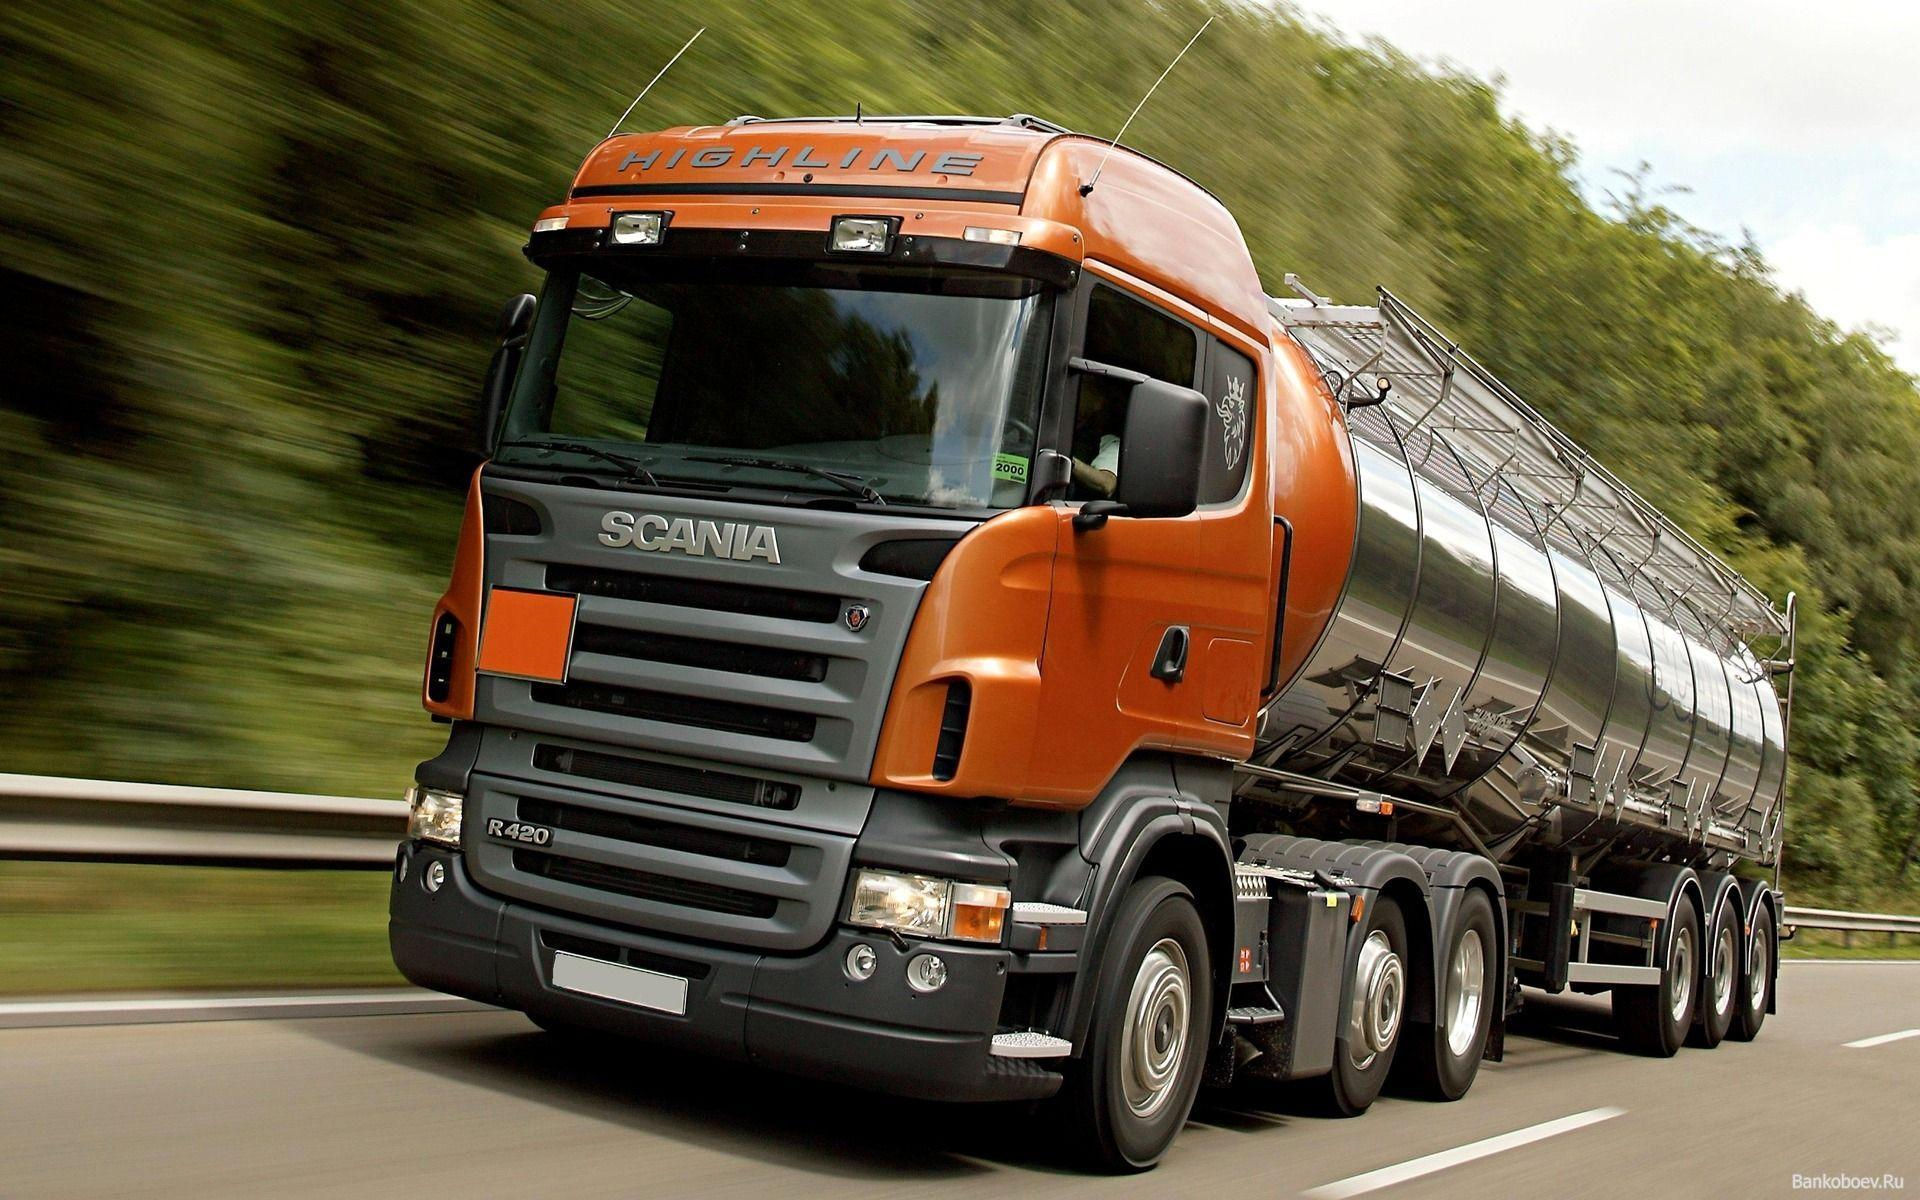

In [1]:
from IPython import display
display.Image("image.jpg")

## <span style='color:red '>1.0 Importing required libraries</span>

In [4]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### For Q-Q Plot
import scipy.stats as stats
from statistics import mean

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


### DL libraries

import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from keras_tuner import RandomSearch

### SMOTETomek for data balancing
from imblearn.combine import SMOTETomek

### imputer libraries
from sklearn.impute import SimpleImputer

### To be able to see maximum columns on screen
pd.set_option('display.max_columns', 500)

In [5]:
#pip install keras-tuner

## <span style='color:red '>2.0 Importing Dataset and Data Cleaning</span>

In [7]:
### importing train dataset
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/APS Sensor Data/aps_failure_training_set.csv')
train.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

  ag_003 ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0      0  37250  1432864  3664156  1007684  25896      0  2551696      0   
1      0  18254   653294  1720800   516724  31642      0  1393352      0   
2      0   1648   370592  1883374   292936  12016      0  1234132      0   
3    318   2212     3232     1872        0      0      0     2668      0   
4      0  43752  1966618  1800340   131646   4588      0  1974038      0   

  aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000  \
0      0      0      0     0  4933296  3655166  1766008  1132040      0   
1     68      0      0     0  2560898  2127150  1084598   338544      0   
2      0      0      0     0  2371990  2173634   300796   153698      0   
3      0      0    642  3894    10184     7554    10764     1014      0   
4    226      0      0     0  3230626  2618878  1058136   551022      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0   1012    268      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0    358    110      0      0      0      0      0   
3      0      0      0     60      6      0      0      0      0      0   
4      0      0      0   1788    642      0      0      0      0  42124   

   ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002 az_003  \
0  469014  4239660   703300   755876      0   5374   2108   4114  12348   
1   71510   772720  1996924    99560      0   7336   7808  13776  13086   
2       0   870456   239798  1450312      0   1620   1156   1228  34250   
3       0        0     2038     5596      0     64      6      6    914   
4  372236  2128914   819596   584074      0   1644    362    562    842   

    az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  \
0   615248  5526276   2378      4      0      0  2328746  1022304  415432   
1  1010074  1873902  14726      6      0      0  1378576   447166  199512   
2  1811606   710672     34      0      0      0   790690   672026  332340   
3       76     2478   2398   1692      0      0     6176      340     304   
4    30194  3911734   1606      0      0      0  1348578  1035668  338762   

   ba_003  ba_004  ba_005   ba_006  ba_007 ba_008 ba_009   bb_000 bc_000  \
0  287230  310246  681504  1118814    3574      0      0  6700214      0   
1  154298  137280  138668   165908  229652  87082   4708  3646660     86   
2  254892  189596  135758   103552   81666     46      0  2673338    128   
3     102      74     406      216      16      0      0    21614      2   
4  236540  182278  151778   163248  470800  19292      0  4289260    448   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0     10    108     50  2551696  97518  947550  799478  330760  353400   
1    454    364    350  1393352  49028  688314  392208  341420  359780   
2    202    576      4  1234132  28804  160176  139730  137160  130640   
3     12      0      0     2668    184    7632    3090      na      na   
4    556    642      2  1974038  86454  653692  399410  306780  282560   

   bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0  299160  305200  283680     na     na     na  178540  76698.08  6700214   
1  366560      na      na     na     na     na    6700  33057.51  3646660   
2      na      na      na     na     na     na   28000  41040.08  2673338   
3      na      na      na     na     n

In [8]:
### importing test dataset
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/APS Sensor Data/aps_failure_test_set.csv')
test.head()

class  aa_000 ab_000 ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0     20     12      0      0      0      0      0   
1   neg      82      0     68     40      0      0      0      0      0   
2   neg   66002      2    212    112      0      0      0      0      0   
3   neg   59816     na   1010    936      0      0      0      0      0   
4   neg    1814     na    156    140      0      0      0      0      0   

   ag_003   ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0    2682     4736     3862     1846        0      0      0     3976      0   
1       0      748    12594     3636        0      0      0     5244      0   
2  199486  1358536  1952422   452706    25130    520      0  1891670      0   
3       0   123922   984314  1680050  1135268  92606  14038  1772828      0   
4       0       72    17926    82834     3114      0      0    48978      0   

  aj_000 ak_000 al_000    am_0   an_000   ao_000  ap_000  aq_000 ar_000  \
0      0      0   1520    2374    11516     9480  111258     470      0   
1     60      0      0       0    23174    18166   23686    1270      0   
2      0      0  77898  110548  3605894  3291610  959756  286536      0   
3      0      0   1116    2372  3546760  3053176  652616  423374      0   
4      0      0      0       0    97146    89920   12932    5092      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0     58     26      0      0      0      0      0   
1      0      0      0     12     82      0      0      0      0      0   
2      0      0      0    106    340      0      0      0      0      0   
3      0   7274      0   1622    432      0      0      0      0      0   
4      0      0      0    102     50      0      0      0      0      0   

  ay_005   ay_006   ay_007  ay_008 ay_009 az_000 az_001 az_002  az_003  \
0      0        0        0   13124      2   1956    434     76     174   
1      0        0      692   16286      0    280     44     50    1274   
2  24286   681260  2808472  474782      0  22984    894   1162    1304   
3   6388  1091104  2930694    2012      0   3526    904   1426  223226   
4  11544    73570     3662   15170      0    126     34     60      58   

    az_004   az_005   az_006  az_007 az_008 az_009   ba_000  ba_001  ba_002  \
0      190     6198     1148    2948      2      0     8762    2566     480   
1      866     3362    11102       0      0      0    12564    1756     638   
2     1856   388700  3424812  123828  23260      0  1662580  667960  387998   
3  2663348  1137664      104       0      0      0  1283806  928212  345132   
4    10768    92898        2       0      0      0    53558   34620    9824   

   ba_003  ba_004  ba_005  ba_006  ba_007  ba_008  ba_009   bb_000 bc_000  \
0     380     196     516      86      66      74       0   124340      4   
1     276     172     132     812     308     192     128    46894      4   
2  226078  161558  148288  154908  220820  147744  210866  4644422    958   
3  265930  194770  158262  219942  620264   13880       0  4201350     98   
4    4552     764     294     192     142       0       0   110094      4   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0      6      4      0     3976    318  107662    3458      na      na   
1      2     38      0     5244    360   20520    3134      na      na   
2   7848   3624      0  1891670  47066  692800  265492  336240  194360   
3    238    880     16  1772828  51468  331744  316130  176000  208420   
4      4    986      0    48978   1100    7932    4966      na      na   

   bm_000 bn_000 bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0      na     na     na     na     na     na  110980     59.53   124340   
1      na     na     na     na     na     na   23320     81.89    46894   
2  245240     na     na     na     na     na  175480  66002.89  4644422   
3  159380     na     na     na     na     na  

In [9]:
### shape of train and test data
print("Training dataset:{}\nTest Dataset: {}".format(train.shape, test.shape))

Training dataset:(60000, 171)
Test Dataset: (16000, 171)


In [10]:
### joining train and test dataset and resetting index
dataset=pd.concat([train, test])

dataset.reset_index(inplace=True)
## dropping index feature as it is not required
dataset.drop('index', axis=1,inplace=True)
dataset.head()

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

  ag_003 ag_004   ag_005   ag_006   ag_007 ag_008 ag_009   ah_000 ai_000  \
0      0  37250  1432864  3664156  1007684  25896      0  2551696      0   
1      0  18254   653294  1720800   516724  31642      0  1393352      0   
2      0   1648   370592  1883374   292936  12016      0  1234132      0   
3    318   2212     3232     1872        0      0      0     2668      0   
4      0  43752  1966618  1800340   131646   4588      0  1974038      0   

  aj_000 ak_000 al_000  am_0   an_000   ao_000   ap_000   aq_000 ar_000  \
0      0      0      0     0  4933296  3655166  1766008  1132040      0   
1     68      0      0     0  2560898  2127150  1084598   338544      0   
2      0      0      0     0  2371990  2173634   300796   153698      0   
3      0      0    642  3894    10184     7554    10764     1014      0   
4    226      0      0     0  3230626  2618878  1058136   551022      0   

  as_000 at_000 au_000 av_000 ax_000 ay_000 ay_001 ay_002 ay_003 ay_004  \
0      0      0      0   1012    268      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0    358    110      0      0      0      0      0   
3      0      0      0     60      6      0      0      0      0      0   
4      0      0      0   1788    642      0      0      0      0  42124   

   ay_005   ay_006   ay_007   ay_008 ay_009 az_000 az_001 az_002 az_003  \
0  469014  4239660   703300   755876      0   5374   2108   4114  12348   
1   71510   772720  1996924    99560      0   7336   7808  13776  13086   
2       0   870456   239798  1450312      0   1620   1156   1228  34250   
3       0        0     2038     5596      0     64      6      6    914   
4  372236  2128914   819596   584074      0   1644    362    562    842   

    az_004   az_005 az_006 az_007 az_008 az_009   ba_000   ba_001  ba_002  \
0   615248  5526276   2378      4      0      0  2328746  1022304  415432   
1  1010074  1873902  14726      6      0      0  1378576   447166  199512   
2  1811606   710672     34      0      0      0   790690   672026  332340   
3       76     2478   2398   1692      0      0     6176      340     304   
4    30194  3911734   1606      0      0      0  1348578  1035668  338762   

   ba_003  ba_004  ba_005   ba_006  ba_007 ba_008 ba_009   bb_000 bc_000  \
0  287230  310246  681504  1118814    3574      0      0  6700214      0   
1  154298  137280  138668   165908  229652  87082   4708  3646660     86   
2  254892  189596  135758   103552   81666     46      0  2673338    128   
3     102      74     406      216      16      0      0    21614      2   
4  236540  182278  151778   163248  470800  19292      0  4289260    448   

  bd_000 be_000 bf_000   bg_000 bh_000  bi_000  bj_000  bk_000  bl_000  \
0     10    108     50  2551696  97518  947550  799478  330760  353400   
1    454    364    350  1393352  49028  688314  392208  341420  359780   
2    202    576      4  1234132  28804  160176  139730  137160  130640   
3     12      0      0     2668    184    7632    3090      na      na   
4    556    642      2  1974038  86454  653692  399410  306780  282560   

   bm_000  bn_000  bo_000 bp_000 bq_000 br_000  bs_000    bt_000   bu_000  \
0  299160  305200  283680     na     na     na  178540  76698.08  6700214   
1  366560      na      na     na     na     na    6700  33057.51  3646660   
2      na      na      na     na     na     na   28000  41040.08  2673338   
3      na      na      na     na     n

In [11]:
### Shape of combined dataset
dataset.shape

(76000, 171)

## <span style='color:red '>3.0 Null/ Missing Values</span>

In [12]:
### replacing na values with NaN values
dataset=dataset.replace('na', np.nan)

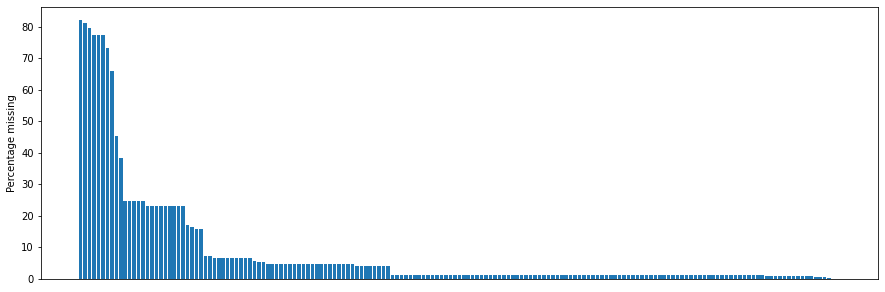

In [13]:
# Plotting Missing values percentage for each feature
fig, ax = plt.subplots(figsize=(15,5))

missing = dataset.isna().sum().div(dataset.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show();

In [14]:
## Dropping features having more than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

0
br_000  82.096053
bq_000  81.188158
bp_000  79.553947
bo_000  77.248684
cr_000  77.226316
ab_000  77.226316
bn_000  73.318421

In [15]:
dataset.drop(list(dropcols.index), axis=1, inplace=True)

In [16]:
# Check shape of the dataset after dropping features
dataset.shape

(76000, 164)

In [17]:
missing_values_count= dataset.isnull().sum()
total_cells = np.product(dataset.shape)
total_missing = missing_values_count.sum()

# Total percentage of data that is missing
print(f"Percentage of total missing cells in the data {round((total_missing/total_cells) * 100, 2)}%")

Percentage of total missing cells in the data 5.31%


In [18]:
### first 20 features with highest null values
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:20]).rename(columns={0:'Null Value Count'})

Null Value Count
bm_000             50095
bl_000             34503
bk_000             29128
cf_000             18842
ch_000             18842
cg_000             18842
ad_000             18842
co_000             18842
cu_000             17526
ct_000             17526
dc_000             17526
db_000             17526
cv_000             17526
da_000             17526
cz_000             17526
cy_000             17526
cx_000             17526
ec_00              12883
cm_000             12455
ed_000             12012

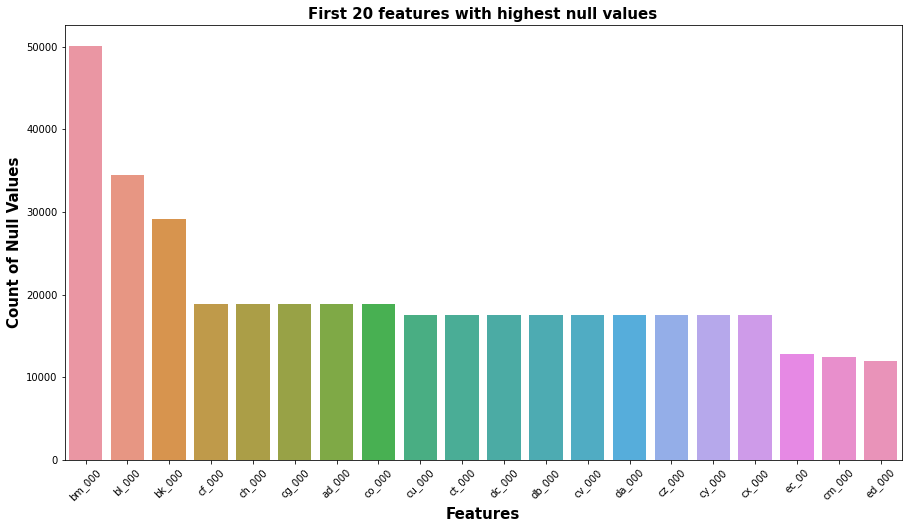

In [19]:
### first 20 features with highest null values
plt.figure(figsize=(15,8))
sns.barplot(y=dataset.isnull().sum().sort_values(ascending=False)[:20], x=dataset.isnull().sum().sort_values(ascending=False).index[:20])
plt.ylabel('Count of Null Values', fontsize=15, fontweight='bold')
plt.xlabel("Features",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("First 20 features with highest null values",fontsize=15, fontweight='bold')
plt.show();

In [20]:
### Last 20 features with highest null values
pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[-20:]).rename(columns={0:'Null Value Count'})

Null Value Count
ap_000               811
bg_000               811
bh_000               811
ai_000               792
am_0                 792
as_000               792
at_000               792
au_000               792
aj_000               792
bj_000               751
ao_000               751
aq_000               751
bi_000               751
by_000               580
ck_000               424
ci_000               424
cj_000               424
bt_000               195
aa_000                 0
class                  0

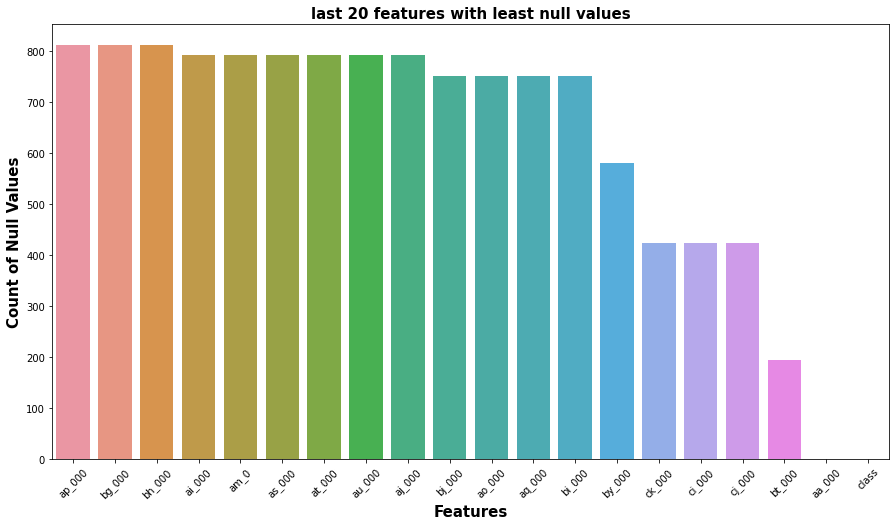

In [21]:
### Last 20 features with highest null values
plt.figure(figsize=(15,8))
sns.barplot(y=dataset.isnull().sum().sort_values(ascending=False)[-20:], x=dataset.isnull().sum().sort_values(ascending=False).index[-20:])
plt.ylabel('Count of Null Values', fontsize=15, fontweight='bold')
plt.xlabel("Features",fontsize=15, fontweight='bold')
plt.xticks(rotation=45)
plt.title("last 20 features with least null values",fontsize=15, fontweight='bold')
plt.show();

In [22]:
### Unique values in numerical features
for feature in [feature for feature in dataset.columns if feature not in ['class']]:
    print("Feature {} has {} unique values".format(feature,dataset[feature].unique()))

Feature aa_000 has [ 76698  33058  41040 ... 136186   7256  81852] unique values
Feature ac_000 has ['2130706438' '0' '228' ... '5652' '3982' '3490'] unique values
Feature ad_000 has ['280' nan '100' ... '7682' '1904' '2226'] unique values
Feature ae_000 has ['0' '16' '104' nan '2' '222' '4' '290' '1286' '170' '6' '806' '1464'
 '274' '18' '8' '342' '64' '34' '192' '144' '176' '1512' '120' '58' '114'
 '460' '12' '112' '1314' '20' '550' '36' '1424' '180' '324' '204' '254'
 '106' '154' '92' '256' '202' '352' '26' '124' '2240' '466' '778' '28'
 '100' '14' '276' '42' '82' '22' '384' '282' '386' '98' '164' '108' '86'
 '38' '266' '1056' '134' '10' '200' '150' '326' '350' '398' '424' '32'
 '128' '752' '314' '732' '2312' '400' '158' '668' '30' '212' '224' '950'
 '4726' '60' '226' '388' '640' '258' '62' '206' '44' '414' '458' '78'
 '492' '308' '52' '50' '162' '24' '662' '536' '456' '130' '140' '184'
 '368' '146' '118' '138' '872' '530' '1118' '356' '218' '126' '102' '1130'
 '12048' '1508' '396' 

In [23]:
### Checking Datatype of features
dataset.dtypes

class     object
aa_000     int64
ac_000    object
ad_000    object
ae_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 164, dtype: object

In [24]:
#dataset.info(verbose=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 164 entries, class to eg_000
dtypes: int64(1), object(163)
memory usage: 95.1+ MB


In [25]:
### Converting datatype of numerical features to int or float from object
for feature in [feature for feature in dataset.columns if feature not in ['class', 'aa_000']]:
    try:
        dataset[feature]=dataset[feature].astype('int64')
    except:
        dataset[feature]=dataset[feature].astype('float64')

In [26]:
#dataset.info(verbose=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Columns: 164 entries, class to eg_000
dtypes: float64(162), int64(1), object(1)
memory usage: 95.1+ MB


In [27]:
### Getting list of Numerical features
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print(len(numerical_features))

163


In [28]:
### Getting list of Discrete Numerical features

discreate_features=[feature for feature in numerical_features if dataset[feature].nunique()<35]
print(discreate_features)

['as_000', 'cd_000', 'ch_000', 'ef_000']


In [29]:
### Getting list of Continuous Numerical features

continuous_features=[feature for feature in numerical_features if feature not in discreate_features]
print(len(continuous_features))

159


Positive: 1375, Negative: 74625


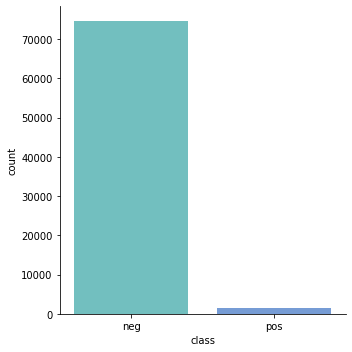

In [30]:
### Visualizing the imbalance in target class
pos = dataset[dataset['class']=='pos'].shape[0]
neg = dataset[dataset['class']=='neg'].shape[0]
print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=dataset, x="class", kind="count", palette="winter_r", alpha=.6)

**Report**
- The target classes are highly imbalanced
- Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the no. of data points in the negative class (majority class) very large compared to that of the positive class (minority class)
- If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model. 
- Hence we should handle imbalanced data with certain methods.

**How to handle Imbalance Data ?**

- Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information.
- **SMOTE:** Synthetic Minority Oversampling Technique
- SMOTE is an oversampling technique where the synthetic samples are generated for the minority class.
- Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.
- It only duplicates the data and it won't add and new information. Hence we look at some different techniques.

### <span style='color:red '>4.0 Distribution of Numerical features</span>

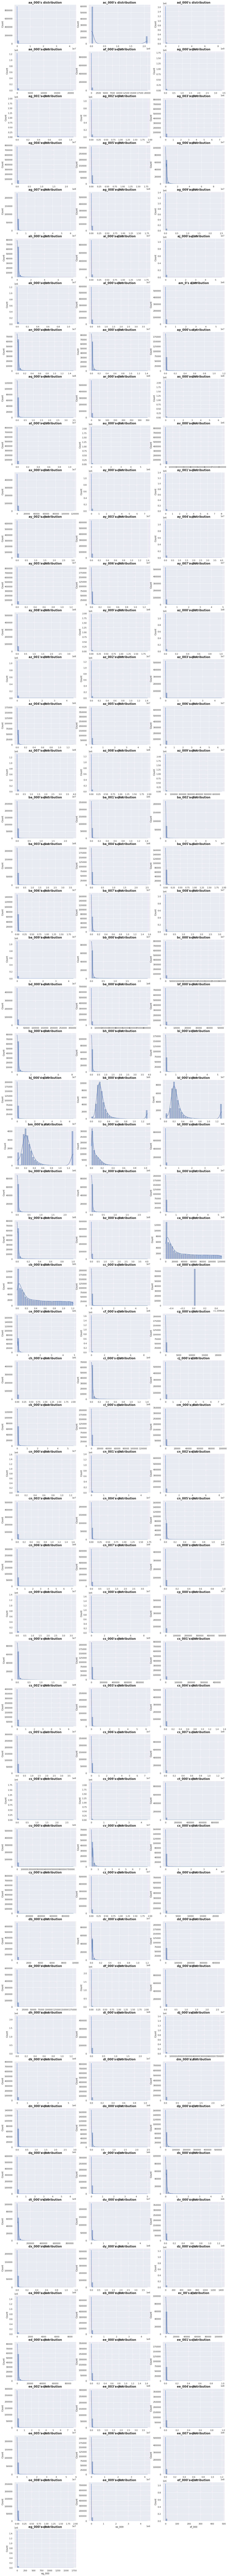

In [33]:
### Checking numerical features distribution to finalize Scaling strategy
plt.figure(figsize=(20,250))
for feature in enumerate(numerical_features):
    plt.subplot(55, 3, feature[0]+1)
    sns.set(rc={'figure.figsize':(5,4)})
    sns.histplot(data=dataset, x=feature[1], kde=True, bins=30)
    plt.title("{}'s distribution".format(feature[1]), fontweight="bold", fontsize=15)



### <span style='color:blue '>Observation</span>

1. Since most of data is not normally distributed, we cannot use standard scalar. So lets use RobustScalar.

**Why Robust scaler and not Standard scaler?**
- Scaling the data using Robust scaler
- Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?** 
- Because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
- This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

### <span style='color:red '>5.0 Outliers</span>

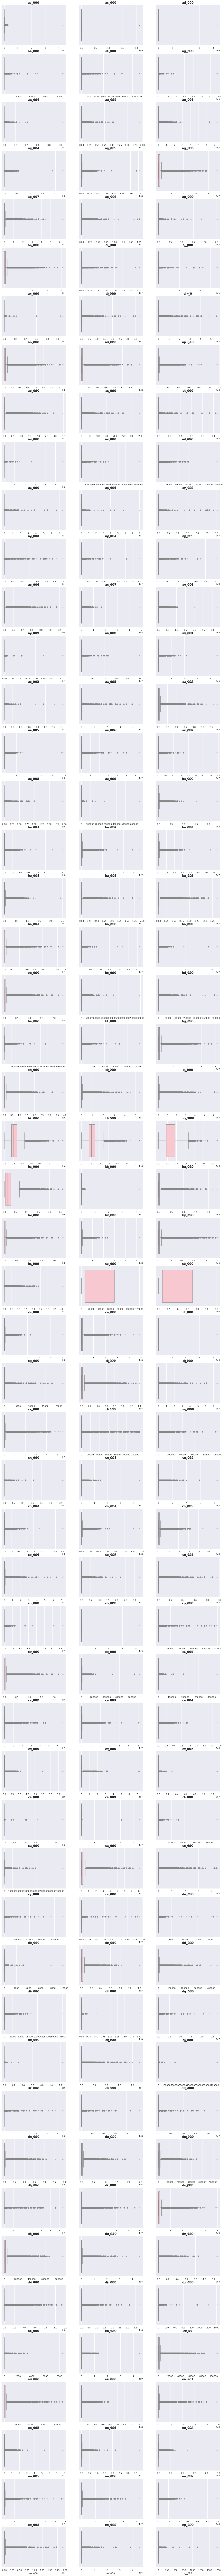

In [34]:
### Checking outliers in continuous features

plt.figure(figsize=(20,250))
for feature in enumerate(continuous_features):
    plt.subplot(55, 3, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

### <span style='color:blue '>Observation</span>

1. Since most of the features has large no. of outliers, so lets put a capping on the outliers.

In [ ]:
### Function to Cap Outlier
def remove_outliers(in_data, in_col, upper, lower):
    # Finding the IQR
    first_quartile = in_data[in_col].quantile(lower)
    third_quartile = in_data[in_col].quantile(upper)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_data.loc[(in_data[in_col]>upper_limit), in_col]= upper_limit
    in_data.loc[(in_data[in_col]<lower_limit), in_col]= lower_limit    
    return in_data

In [ ]:
### Capping outliers from continuous features
for feature in continuous_features:
    dataset=remove_outliers(dataset, feature, 0.9, 0.1)

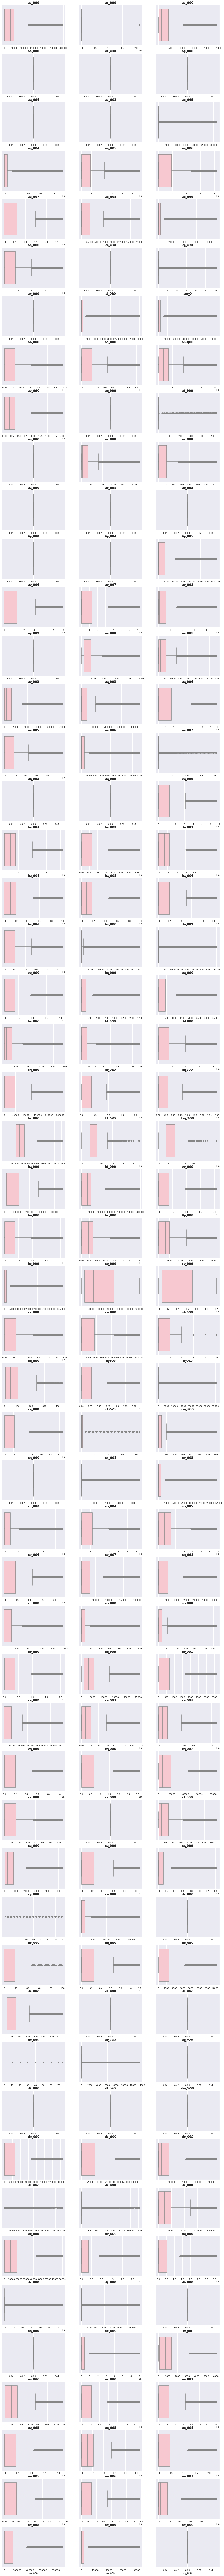

In [ ]:
### Checking outliers in continuous features after outlier capping

plt.figure(figsize=(20,250))
for feature in enumerate(continuous_features):
    plt.subplot(55, 3, feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.boxplot(data=dataset, x=feature[1], color='pink')
    plt.title("{}".format(feature[1]), fontweight="bold", fontsize=15)

### <span style='color:red '>6.0 Handling Missing Values</span>

In [ ]:
# Splitting X and y for all Experiments
X= dataset.drop('class', axis=1)
y = dataset['class']
y= y.replace({'pos': 1, 'neg': 0})

In [ ]:
### shape of X
X.shape

(76000, 163)

In [ ]:
# Fit with robust scaler 
robustscaler = RobustScaler()
X = robustscaler.fit_transform(X)

In [ ]:
### checking total null values in dataset
pd.DataFrame(X).isnull().sum().sum()

662323

### <span style='color:red '>6.1 Imputating missing values with Mean and Median</span>

In [ ]:
### copy of X and y
X1= X
y1= y

In [ ]:
### function to impute missing vales in dataset using imputation strategy, checking and return accuracy of ANN model
def imputer_experiment(strategy, X, y):
    model=Sequential()
    model.add(Dense(units=3, kernel_initializer='he_uniform', activation='relu', input_dim=163))
    model.add(Dense(units=3, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

    imputer = SimpleImputer(strategy=strategy)
    imputer.fit(X)
    imputer.transform(X)
    model_history=model.fit(X, y, batch_size=10, epochs=10, validation_split=0.25)
    score=model_history.history['accuracy'][-1]
    return score


In [ ]:
### imputing missing values in dataset with mean and median
imputer_result=[]
for i in ['mean', 'median']:
    score=imputer_experiment(i, X1, y1)
    imputer_result.append((i, score))

imputer_result

Epoch 1/10
5700/5700 [==============================] - 16s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 2/10
5700/5700 [==============================] - 14s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 3/10
5700/5700 [==============================] - 16s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 4/10
5700/5700 [==============================] - 15s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 5/10
5700/5700 [==============================] - 15s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 6/10
5700/5700 [==============================] - 16s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 7/10
5700/5700 [==============================] - 14s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 8/10
5700/5700 [=====

[('mean', 0.9832456111907959), ('median', 0.9832456111907959)]

### <span style='color:red '>6.2 Imputating missing values with constant</span>

In [ ]:
### function to impute missing vales in dataset using constant imputation strategy, checking and return accuracy of ANN model
def imputer_experiment_constant(strategy, fill, X, y):
    model=Sequential()
    model.add(Dense(units=3, kernel_initializer='he_uniform', activation='relu', input_dim=163))
    model.add(Dense(units=3, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid')) 
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 

    imputer = SimpleImputer(strategy=strategy, fill_value=fill)
    imputer.fit(X)
    imputer.transform(X)
    model_history=model.fit(X, y, batch_size=10, epochs=10, validation_split=0.25)
    score=model_history.history['accuracy'][-1]
    return score


In [ ]:
### imputing missing values in dataset with constant
score=imputer_experiment_constant('constant', 99, X1, y1)
imputer_result.append(('constant', score))

Epoch 1/10
5700/5700 [==============================] - 15s 2ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 2/10
5700/5700 [==============================] - 14s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 3/10
5700/5700 [==============================] - 14s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 4/10
5700/5700 [==============================] - 14s 3ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 5/10
5700/5700 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 6/10
5700/5700 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 7/10
5700/5700 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.9832 - val_loss: nan - val_accuracy: 0.9779
Epoch 8/10
5700/5700 [=====

In [ ]:
### getting accuracy with each imputation strategy
for i in imputer_result:
    print(f"Imputation with {i[0]} has accuracy {i[1]}")

Imputation with mean has accuracy 0.9832456111907959
Imputation with median has accuracy 0.9832456111907959
Imputation with constant has accuracy 0.9832456111907959


### <span style='color:blue '>Observation</span>

1. Since mean and median are giving same accuracy and our dataset has outliers, hence using Median for imputation and balancing the data

### <span style='color:red '>7.0 Balancing the Target feature</span>

 **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
 - This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class
 
 - To add new data of minority class
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - To remove the tomek links of the majority class
 1. Choose random data from the majority class.
 2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [ ]:
### copy of X and y
X2=X
y2=y

In [ ]:
### Using median as imputer strategy
imputer = SimpleImputer(strategy='median')
imputer.fit(X2)

X2=imputer.transform(X2)

In [ ]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_bal, y_bal = smt.fit_resample(X2, y2)

In [ ]:
### checking shape of balanced data
X_bal.shape

(149248, 163)

In [ ]:
y_bal.shape

(149248,)

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_bal,y_bal,test_size=0.2,random_state=42)

In [ ]:
### Model to check accuracy after balancing
model_final=Sequential()
model_final.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu', input_dim=163))
model_final.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu'))
model_final.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

model_final.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_final.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 820       
                                                                 
 dense_19 (Dense)            (None, 5)                 30        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history=model_final.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.25)
score=model_history.history['accuracy'][-1]

Epoch 1/30
8955/8955 [==============================] - 25s 3ms/step - loss: 0.2974 - accuracy: 0.8853 - val_loss: 0.2686 - val_accuracy: 0.8897
Epoch 2/30
8955/8955 [==============================] - 24s 3ms/step - loss: 0.1728 - accuracy: 0.9286 - val_loss: 0.1348 - val_accuracy: 0.9599
Epoch 3/30
8955/8955 [==============================] - 24s 3ms/step - loss: 0.1513 - accuracy: 0.9675 - val_loss: 0.1058 - val_accuracy: 0.9688
Epoch 4/30
8955/8955 [==============================] - 26s 3ms/step - loss: 0.1018 - accuracy: 0.9698 - val_loss: 0.0997 - val_accuracy: 0.9703
Epoch 5/30
8955/8955 [==============================] - 26s 3ms/step - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.1018 - val_accuracy: 0.9698
Epoch 6/30
8955/8955 [==============================] - 26s 3ms/step - loss: 0.1855 - accuracy: 0.9722 - val_loss: 0.0926 - val_accuracy: 0.9733
Epoch 7/30
8955/8955 [==============================] - 22s 2ms/step - loss: 0.0901 - accuracy: 0.9733 - val_loss: 0.0940 - val_ac

In [ ]:
### Getting 98.06 percent accuracy after data balancing, which is reduced from 98.32 percent
score

0.9806249141693115

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


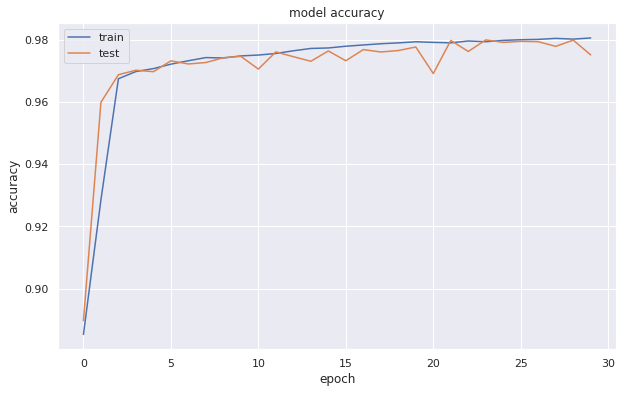

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

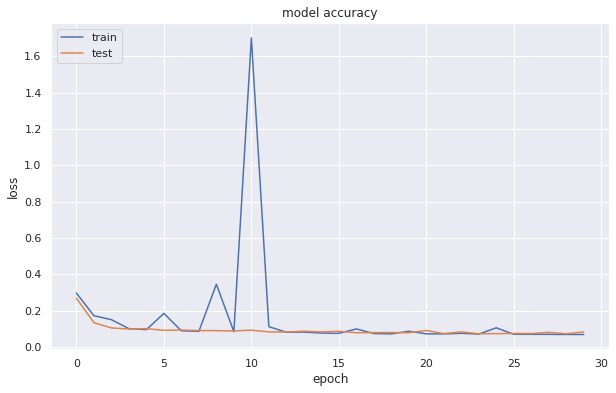

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### Predicting for test data
y_pred=model_final.predict(X_test)

933/933 [==============================] - 2s 2ms/step


In [ ]:
### Since output layer is sigmoid, lets use threshold as 0.5
y_pred=y_pred>0.5

In [ ]:
### Confusion matrix
confusion_mat=confusion_matrix(y_pred, y_test)
confusion_mat

array([[14526,   492],
       [  273, 14559]])

In [ ]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [ ]:
### Calculating total cost incurred by company due to this experiment.
total_cost_balanced=total_cost(y_test, y_pred)
total_cost_balanced

248730

### <span style='color:red '>8.0 Accuracy with Unbalanced data</span>

In [ ]:
# Fit with robust scaler object
robustscaler = RobustScaler()
X_unb = robustscaler.fit_transform(X)

In [ ]:
### Using median as imputer strategy
imputer = SimpleImputer(strategy='median')
imputer.fit(X_unb)

X_unb=imputer.transform(X_unb)

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_unb,y,test_size=0.2,random_state=42)

In [ ]:
# Model to check accuracy without balancing
model_unb=Sequential()
model_unb.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu', input_dim=163))
model_unb.add(Dense(units=5, kernel_initializer='he_uniform', activation='relu'))
model_unb.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

model_unb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_unb.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 5)                 820       
                                                                 
 dense_22 (Dense)            (None, 5)                 30        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history=model_unb.fit(X_train, y_train, batch_size=10, epochs=30, validation_split=0.25)
score=model_history.history['accuracy'][-1]

Epoch 1/30
4560/4560 [==============================] - 14s 3ms/step - loss: 4.8485 - accuracy: 0.9823 - val_loss: 0.0571 - val_accuracy: 0.9839
Epoch 2/30
4560/4560 [==============================] - 14s 3ms/step - loss: 0.8563 - accuracy: 0.9844 - val_loss: 0.0425 - val_accuracy: 0.9855
Epoch 3/30
4560/4560 [==============================] - 11s 2ms/step - loss: 0.0376 - accuracy: 0.9869 - val_loss: 0.0351 - val_accuracy: 0.9883
Epoch 4/30
4560/4560 [==============================] - 11s 2ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0383 - val_accuracy: 0.9877
Epoch 5/30
4560/4560 [==============================] - 12s 3ms/step - loss: 0.0330 - accuracy: 0.9888 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 6/30
4560/4560 [==============================] - 12s 3ms/step - loss: 0.0305 - accuracy: 0.9890 - val_loss: 0.7526 - val_accuracy: 0.9874
Epoch 7/30
4560/4560 [==============================] - 13s 3ms/step - loss: 0.4769 - accuracy: 0.9897 - val_loss: 0.0342 - val_ac

In [ ]:
### we have increase in accuracy without balanced data
score

0.99168860912323

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


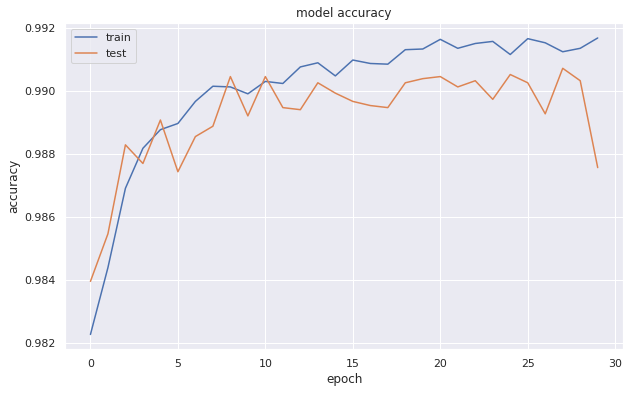

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

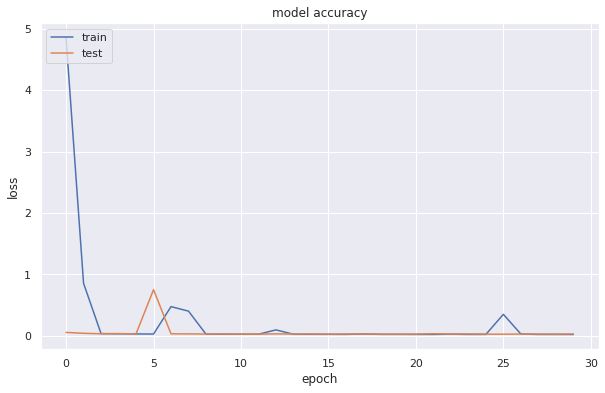

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### Predicting for test data
y_pred=model_unb.predict(X_test)
### Since output layer is sigmoid, lets use threshold as 0.5
y_pred=y_pred>0.5

475/475 [==============================] - 1s 1ms/step


In [ ]:
### Confusion matrix
confusion_mat=confusion_matrix(y_pred, y_test)
confusion_mat

array([[14792,    78],
       [  109,   221]])

In [ ]:
### Calculating total cost incurred by company due to this experiment.
total_cost_unbalanced=total_cost(y_test, y_pred)
total_cost_unbalanced

40090

### <span style='color:red '>9.0 Hyper-Parameter Tuning</span>

### <span style='color:red '>9.1 HPT for optimizers</span>

In [ ]:
### Function to build model to get best optimizer
def build_model(hp):
    model= Sequential()
    model.add(Dense(32, activation='relu', input_dim=163))
    model.add(Dense(1, activation='sigmoid'))

    optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop', 'adadelta'])
    model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
### using randomsearch to get best optimizer
tuner= RandomSearch(build_model, objective='val_accuracy', max_trials=5)

In [ ]:
### running tuner object
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 4 Complete [00h 00m 25s]
val_accuracy: 0.988223671913147

Best val_accuracy So Far: 0.988223671913147
Total elapsed time: 00h 00m 25s


In [ ]:
### best optimizer
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [ ]:
### Function to get optimum number of units in input and hidden layers
def build_model(hp):
    model= Sequential()
    units=hp.Int('units', min_value=8, max_value=128,step=8)

    model.add(Dense(units=units, activation='relu', input_dim=163))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
### using randomsearch to get optimum no. of units
tuner= RandomSearch(build_model, objective='val_accuracy', max_trials=5, directory='some dir')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.9865789413452148

Best val_accuracy So Far: 0.9892105460166931
Total elapsed time: 00h 03m 00s


In [ ]:
### optimum units
tuner.get_best_hyperparameters()[0].values

{'units': 72}

In [ ]:
### Function to get optimum no. of hidden layers.
def build_model(hp):
    model= Sequential()
    model.add(Dense(72, activation='relu', input_dim=163))
    for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
        model.add(Dense(72, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
tuner= RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='some dir_layers')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 30s]
val_accuracy: 0.9884868264198303

Best val_accuracy So Far: 0.9886842370033264
Total elapsed time: 00h 01m 56s


In [ ]:
### optimum no. of Hidden layers
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3}

In [ ]:
### Function to get optimum no. of hidden layers and units, best optimizer, and best activation function

def build_model(hp):
  model= Sequential()
  counter=0
  
  for i in range(hp.Int('num_layers', min_value=1, max_value=10)):
    if counter==0:
      model.add(
          Dense(
              hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
              activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid']),
              input_dim=163))
    else:
      model.add(
          Dense(
              hp.Int('units'+str(i), min_value=8, max_value=128, step=8),
              activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid'])
              ))
    counter+=1
  model.add(Dense(1, activation='sigmoid'))

  optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd', 'nadam', 'adadelta'])

  model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner= RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='some dir_2')

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 26s]
val_accuracy: 0.9809868335723877

Best val_accuracy So Far: 0.9850000143051147
Total elapsed time: 00h 02m 14s


In [ ]:
### best parameters
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units0': 112,
 'activation0': 'sigmoid',
 'optimizer': 'adam',
 'units1': 48,
 'activation1': 'sigmoid',
 'units2': 24,
 'activation2': 'sigmoid',
 'units3': 80,
 'activation3': 'relu',
 'units4': 120,
 'activation4': 'tanh',
 'units5': 24,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu',
 'units9': 8,
 'activation9': 'relu'}

In [ ]:
### getting model object with above best parameters
model=tuner.get_best_models(num_models=1)[0]

In [ ]:
### Training the best model
model.fit(X_train, y_train, epochs=40, initial_epoch=5, validation_data=(X_test, y_test))

Epoch 6/40
1900/1900 [==============================] - 12s 5ms/step - loss: 0.0330 - accuracy: 0.9884 - val_loss: 0.0421 - val_accuracy: 0.9841
Epoch 7/40
1900/1900 [==============================] - 8s 4ms/step - loss: 0.0328 - accuracy: 0.9875 - val_loss: 0.0381 - val_accuracy: 0.9859
Epoch 8/40
1900/1900 [==============================] - 7s 4ms/step - loss: 0.0315 - accuracy: 0.9884 - val_loss: 0.0366 - val_accuracy: 0.9864
Epoch 9/40
1900/1900 [==============================] - 9s 4ms/step - loss: 0.0301 - accuracy: 0.9890 - val_loss: 0.0393 - val_accuracy: 0.9862
Epoch 10/40
1900/1900 [==============================] - 8s 4ms/step - loss: 0.0294 - accuracy: 0.9894 - val_loss: 0.0364 - val_accuracy: 0.9871
Epoch 11/40
1900/1900 [==============================] - 9s 5ms/step - loss: 0.0286 - accuracy: 0.9895 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 12/40
1900/1900 [==============================] - 7s 4ms/step - loss: 0.0286 - accuracy: 0.9899 - val_loss: 0.0376 - val_accur

In [ ]:
### Predicting for test data
y_pred=model.predict(X_test)
### Since output layer is sigmoid, lets use threshold as 0.5
y_pred=y_pred>0.5

475/475 [==============================] - 1s 2ms/step


In [ ]:
### Confusion matrix
confusion_mat=confusion_matrix(y_pred, y_test)
confusion_mat

array([[14877,   155],
       [   24,   144]])

In [ ]:
### Calculating total cost incurred by company due to this experiment.
total_cost_hpt=total_cost(y_test, y_pred)
total_cost_hpt

77740